In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from emnist import extract_training_samples, extract_test_samples
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#### IMPORTING DATA FROM EMNIST

In [2]:
x_train_l, y_train_l = extract_training_samples('letters')
x_test_l, y_test_l = extract_test_samples('letters')

x_train_d, y_train_d = extract_training_samples('digits')
x_test_d, y_test_d = extract_test_samples('digits')

#### ADDING CHANNEL TO DIMENSION

In [3]:
x_train_l = x_train_l.reshape(x_train_l.shape[0], 28, 28, 1)
x_test_l = x_test_l.reshape(x_test_l.shape[0], 28, 28, 1)

x_train_d = x_train_d.reshape(x_train_d.shape[0], 28, 28, 1)
x_test_d = x_test_d.reshape(x_test_d.shape[0], 28, 28, 1)

#### CATEGORIZING INTO LETTERS & DIGITS

In [5]:
y_train_l_new, y_test_l_new = np.array([0 for x in y_train_l]), np.array([0 for x in y_test_l])
y_train_d_new, y_test_d_new = np.array([1 for x in y_train_d]), np.array([1 for x in y_test_d])

#### SHUFFLING DATA AND SPLITTING FOR BALANCING PURPOSES

In [6]:
idx = [x for x in range(len(y_train_d))]
np.random.shuffle(idx)

idx_test = [x for x in range(len(y_test_d))]
np.random.shuffle(idx_test)

In [8]:
shuffle_x_train_d, shuffle_y_train_d = x_train_d[idx], y_train_d_new[idx]
shuffle_x_test_d, shuffle_y_test_d = x_test_d[idx_test], y_test_d_new[idx_test]

In [9]:
split_x_train_d, split_y_train_d = np.array([shuffle_x_train_d[x] for x in range(124800)]), np.array([shuffle_y_train_d[x] for x in range(124800)])
split_x_test_d, split_y_test_d = np.array([shuffle_x_test_d[x] for x in range(20800)]), np.array([shuffle_y_test_d[x] for x in range(20800)])

#### NORMALIZING

In [10]:
split_x_train_d, split_x_test_d = split_x_train_d / 255.0, split_x_test_d / 255.0
x_train_l, x_test_l = x_train_l / 255.0, x_test_l / 255.0

#### COMBINING DATASETS

In [11]:
comb_x_train = np.concatenate((x_train_l, split_x_train_d), axis=0)
comb_y_train = np.concatenate((y_train_l_new, split_y_train_d), axis=0)

comb_x_test = np.concatenate((x_test_l, split_x_test_d), axis=0)
comb_y_test = np.concatenate((y_test_l_new, split_y_test_d), axis=0)

In [12]:
comb_x_train.shape

(249600, 28, 28, 1)

In [13]:
comb_y_train.shape

(249600,)

#### MODEL BUILDING AND TRAINING

In [14]:
model = Sequential([
    Conv2D(16, (3, 3), input_shape=comb_x_train.shape[1:], activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation="relu"),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')])

model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [17]:
model.fit(comb_x_train, comb_y_train, epochs=20, validation_data=(comb_x_test, comb_y_test))

Epoch 1/20
7800/7800 [==============================] - 23s 3ms/step - loss: 0.1578 - acc: 0.9322 - val_loss: 0.1687 - val_acc: 0.9306
Epoch 2/20
7800/7800 [==============================] - 23s 3ms/step - loss: 0.1517 - acc: 0.9344 - val_loss: 0.1622 - val_acc: 0.9318
Epoch 3/20
7800/7800 [==============================] - 24s 3ms/step - loss: 0.1459 - acc: 0.9377 - val_loss: 0.1641 - val_acc: 0.9321
Epoch 4/20
7800/7800 [==============================] - 23s 3ms/step - loss: 0.1418 - acc: 0.9387 - val_loss: 0.1617 - val_acc: 0.9319
Epoch 5/20
7800/7800 [==============================] - 23s 3ms/step - loss: 0.1373 - acc: 0.9407 - val_loss: 0.1634 - val_acc: 0.9325
Epoch 6/20
7800/7800 [==============================] - 23s 3ms/step - loss: 0.1337 - acc: 0.9416 - val_loss: 0.1650 - val_acc: 0.9325
Epoch 7/20
7800/7800 [==============================] - 23s 3ms/step - loss: 0.1301 - acc: 0.9430 - val_loss: 0.1691 - val_acc: 0.9301
Epoch 8/20
7800/7800 [==============================] -

In [18]:
model.save('model\combined.h5')

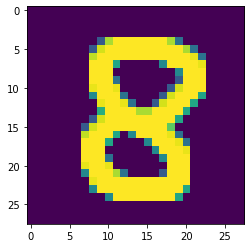

In [ ]:
filename = 'test/8.png'
img = cv2.imread(filename)[:, :, 0]
img = cv2.bitwise_not(img)
img = img[:,:,np.newaxis]
img.shape
plt.imshow(img)

In [ ]:
prediction = model.predict(np.array([img]))
print("Class", np.round(prediction))

1/1 [==============================] - 0s 128ms/step
Class [[1.]]
